# Downloading and Unzipping the Dataset

In [1]:
# Install the Kaggle API client.
!pip install -q kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

  0% 0.00/48.6k [00:00<?, ?B/s]
100% 48.6k/48.6k [00:00<00:00, 3.35MB/s]


In [2]:
import pandas as pd
import zipfile

# Unzip the dataset.
with zipfile.ZipFile('/content/breast-cancer-wisconsin-data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

# Find CSV file(s) in the current directory.
import glob
csv_files = glob.glob('./*.csv')

# Load the first CSV file into a pandas DataFrame.
if csv_files:
    df = pd.read_csv(csv_files[0])
    print(df.head())
else:
    print("No CSV files found.")

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

# Data Cleaning

In [3]:
import pandas as pd

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values:")
print(missing_values)


# Convert diagnosis column to binary values (0 for benign, 1 for malignant)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Display the cleaned dataset
print("\nCleaned dataset:")
print(df.head())

# Save the cleaned dataset to a new CSV file
# Replace 'cleaned_dataset.csv' with the desired file name
df.to_csv('cleaned_dataset.csv', index=False)



Missing values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

Importing Libraries:
Imports the pandas library, aliasing it as pd. Pandas is used for data manipulation and analysis.

Checking for Missing Values:
Creates a Pandas Series, missing_values, containing the count of missing values for each column.
Prints the count of missing values for each column.

Converting Diagnosis Column to Binary Values:
Converts values in the 'diagnosis' column to binary values: 'M' (malignant) mapped to 1, 'B' (benign) mapped to 0.

Displaying the Cleaned Dataset:
Prints the cleaned dataset using df.head(), showing the first five rows.
Provides a visual check of changes made after handling missing values and converting the 'diagnosis' column.

Saving the Cleaned Dataset to a CSV File:
Saves the cleaned dataset to a new CSV file named 'cleaned_dataset.csv'.
index=False ensures the DataFrame index is not included in the saved CSV file.

# Feature Engineering

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Feature engineering steps
# 1. Impute missing values (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# 2. Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X.columns)

# 3. Create polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = pd.DataFrame(poly.fit_transform(X_scaled), columns=poly.get_feature_names_out(X_scaled.columns))

# 4. Feature selection using ANOVA F-statistic
k_best = SelectKBest(score_func=f_classif, k=10)
X_selected = k_best.fit_transform(X_poly, y)

# 5. Dimensionality reduction using PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_selected)

# Display the shape of the final feature matrix
print("Final Feature Matrix Shape:", X_pca.shape)

# Append the target variable to the final feature matrix
X_final = pd.DataFrame(X_pca, columns=[f'feature_{i}' for i in range(X_pca.shape[1])])
X_final['diagnosis'] = y

# Save the final feature matrix to a new CSV file
X_final.to_csv('final_feature_matrix.csv', index=False)


Final Feature Matrix Shape: (569, 10)


Importing Libraries:
Imports the pandas library (pd) for data manipulation and the necessary modules from scikit-learn for preprocessing.

Loading the Cleaned Dataset:
Reads the cleaned dataset from the CSV file ('cleaned_dataset.csv') into a Pandas DataFrame named df.

Separating Features and Target Variable:
Separates the features (X) and the target variable (y) from the DataFrame.
Drops irrelevant columns like 'id', 'diagnosis', and 'Unnamed: 32' from the features.

Feature Engineering Steps:
a. Imputing Missing Values:
Utilizes SimpleImputer to impute missing values in the dataset with the mean.
Creates a new DataFrame X_imputed with imputed values.

b. Standardizing Features:
Uses StandardScaler to standardize the features by scaling them to have zero mean and unit variance.
Generates a new DataFrame X_scaled with standardized features.

c. Creating Polynomial Features:
Applies PolynomialFeatures to create polynomial features up to the second degree.
Generates a new DataFrame X_poly with polynomial features.

d. Feature Selection using ANOVA F-statistic:
Utilizes SelectKBest with ANOVA F-statistic to select the top k features.
Creates a new DataFrame X_selected with the selected features.

e. Dimensionality Reduction using PCA:
Applies Principal Component Analysis (PCA) to reduce dimensionality to 10 components.
Generates a new DataFrame X_pca with the principal components.

Displaying the Shape of the Final Feature Matrix:
Prints the shape of the final feature matrix (X_pca).

Appending Target Variable and Saving to CSV:
Combines the final feature matrix with the target variable ('diagnosis') into a new DataFrame X_final.
Saves the final feature matrix to a new CSV file ('final_feature_matrix.csv').

# EDA

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic statistics about the dataset
print("Basic Statistics:")
print(df.describe())

Basic Statistics:
                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813       

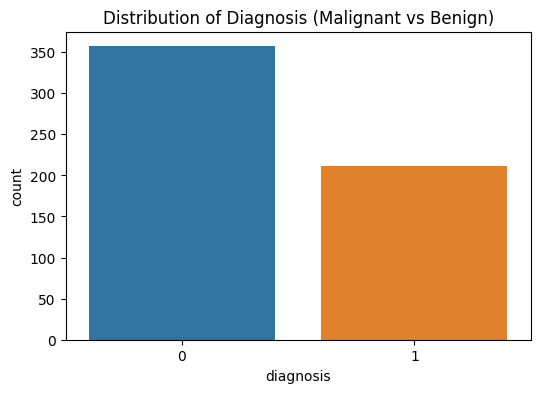

In [41]:
# Visualize the distribution of diagnosis (Malignant vs Benign)
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (Malignant vs Benign)')
plt.show()

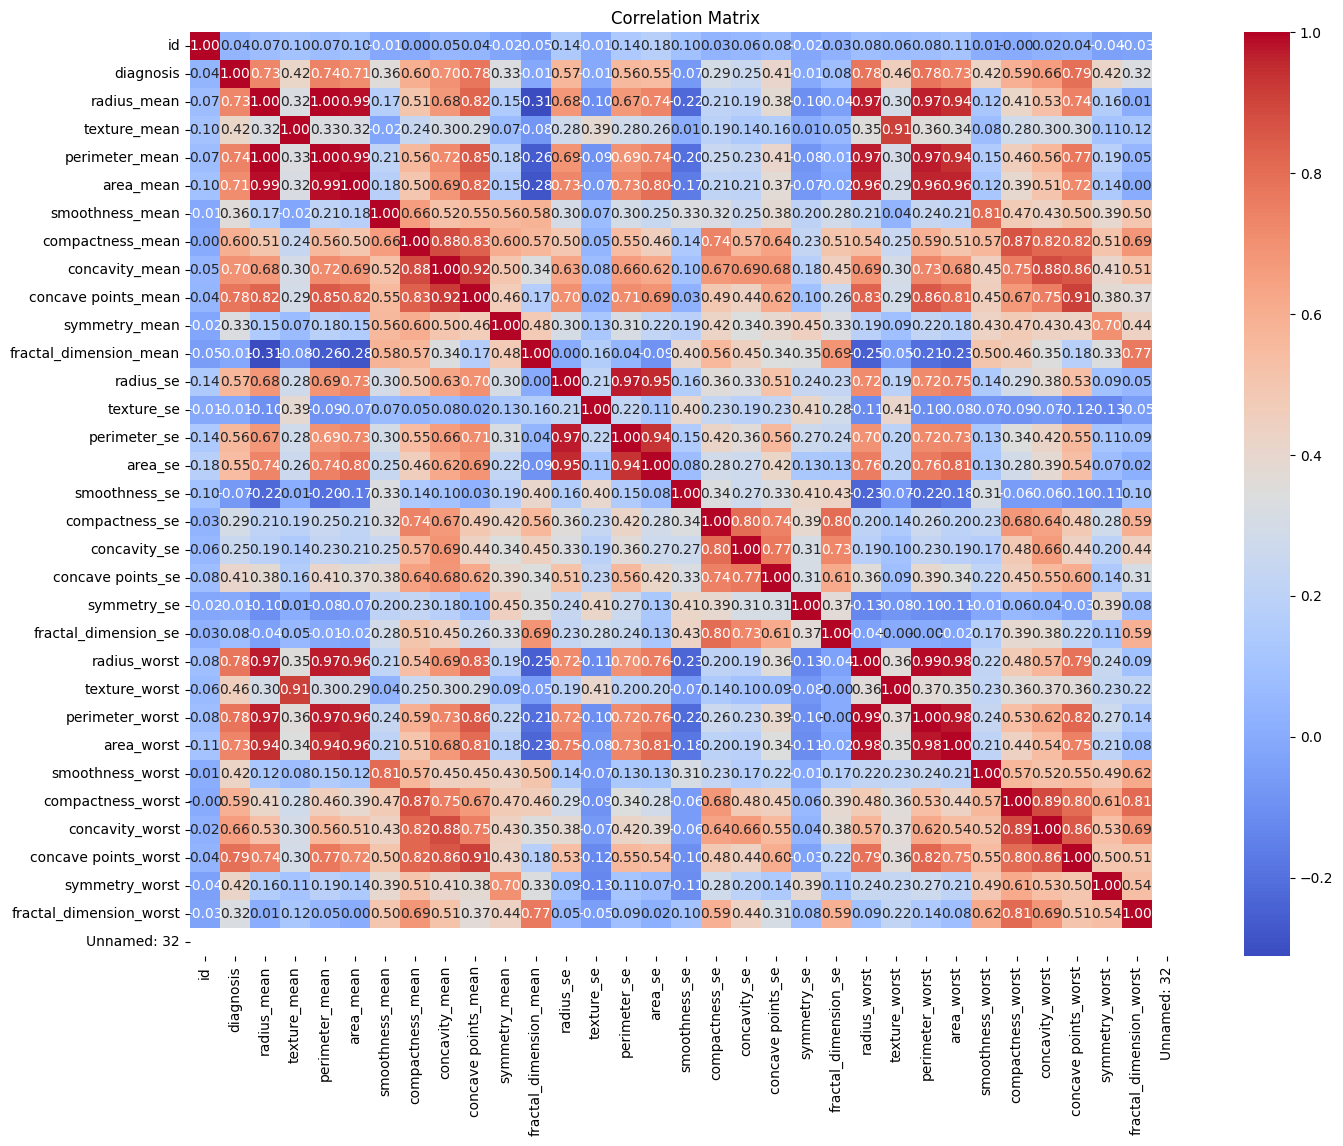

In [42]:
# Visualize the correlation matrix to understand feature relationships
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

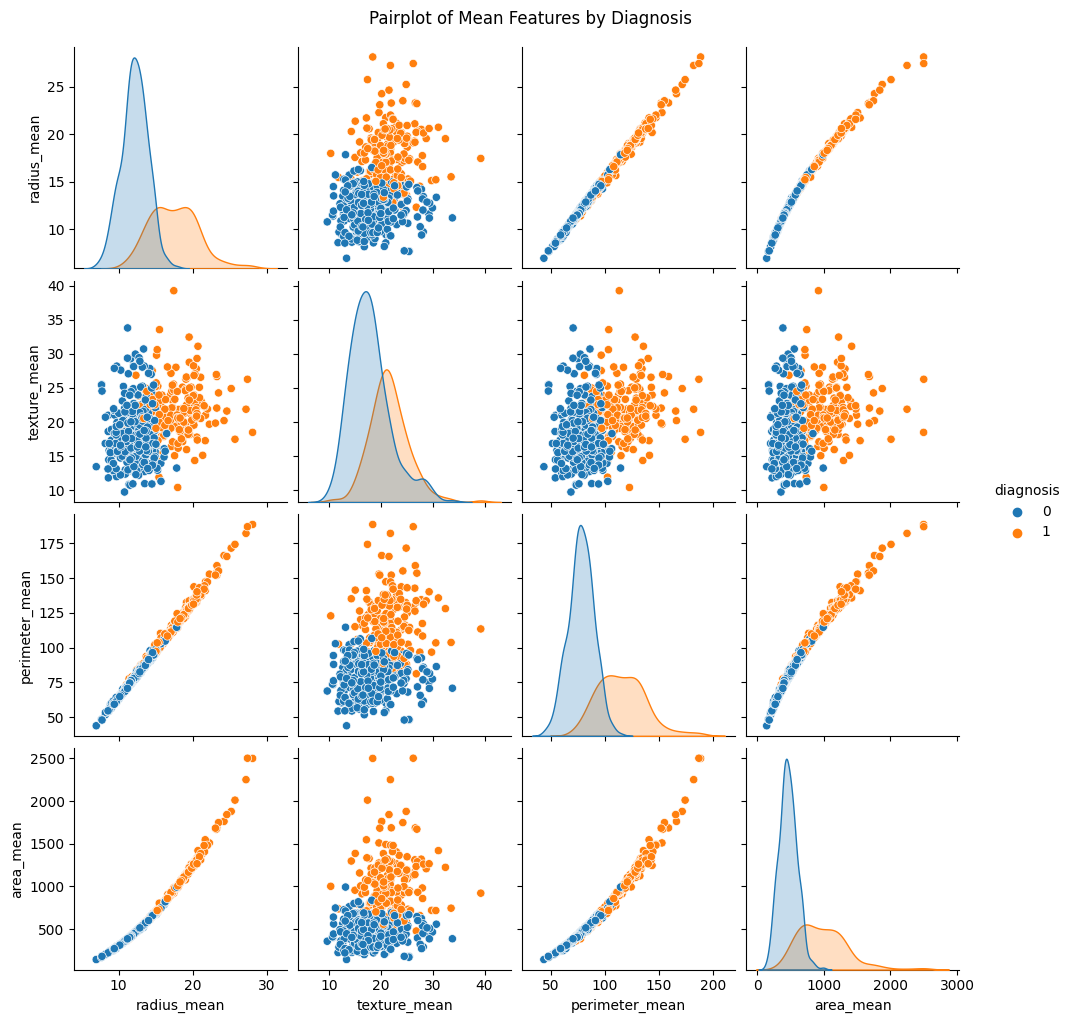

In [43]:
# Pairplot to visualize relationships between different features
sns.pairplot(df, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean'])
plt.suptitle('Pairplot of Mean Features by Diagnosis', y=1.02)
plt.show()

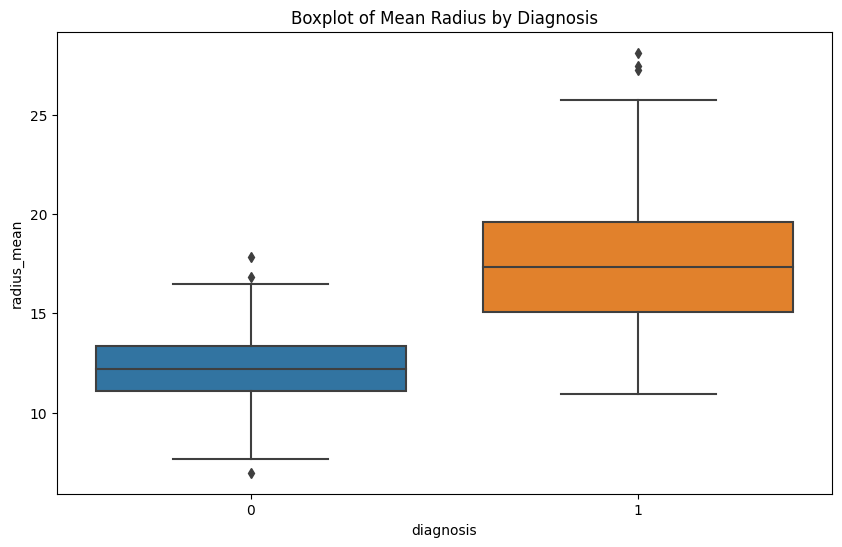

In [44]:
# Boxplot to visualize the distribution of mean radius by diagnosis
plt.figure(figsize=(10, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title('Boxplot of Mean Radius by Diagnosis')
plt.show()

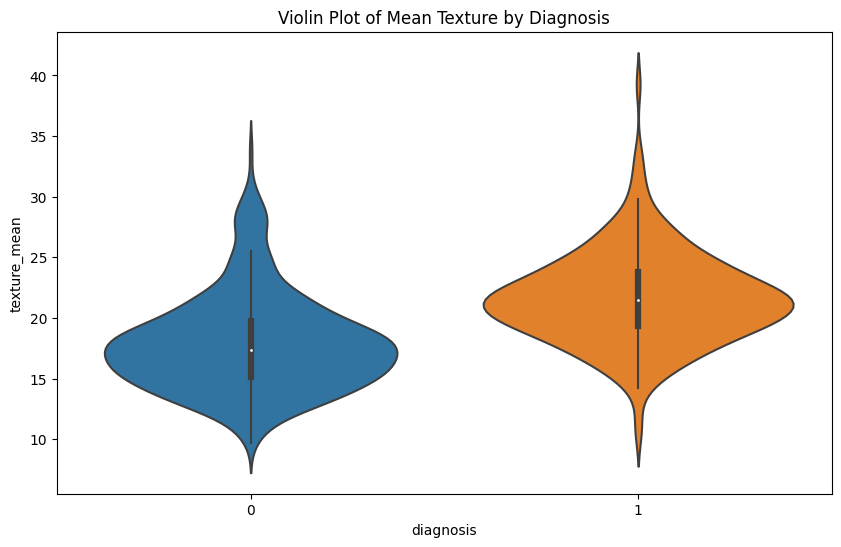

In [45]:
# Violin plot to compare the distribution of mean texture by diagnosis
plt.figure(figsize=(10, 6))
sns.violinplot(x='diagnosis', y='texture_mean', data=df)
plt.title('Violin Plot of Mean Texture by Diagnosis')
plt.show()

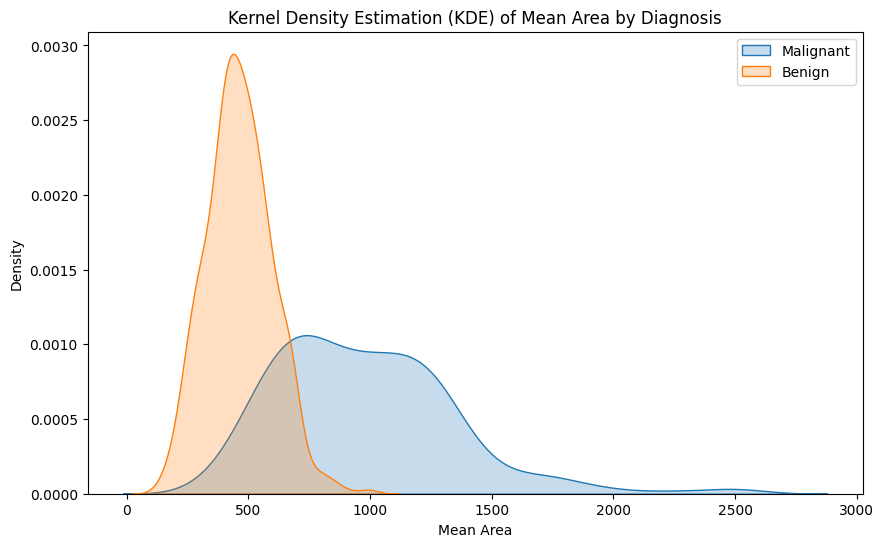

In [46]:
# Convert 'diagnosis' column to string labels
df['diagnosis'] = df['diagnosis'].map({0: 'Benign', 1: 'Malignant'})

# Explore distribution of mean area by diagnosis using KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['diagnosis'] == 'Malignant']['area_mean'], label='Malignant', fill=True)
sns.kdeplot(df[df['diagnosis'] == 'Benign']['area_mean'], label='Benign', fill=True)
plt.title('Kernel Density Estimation (KDE) of Mean Area by Diagnosis')
plt.xlabel('Mean Area')
plt.legend()
plt.show()


# Classification

In [49]:
import pandas as pd
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer, confusion_matrix, precision_score, recall_score, f1_score
import timeit

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Separate features and target variable
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Define classifiers
classifiers = {
    'C4.5 Decision Tree': DecisionTreeClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Evaluation metrics
scoring_metrics = {
    'Accuracy': 'accuracy',
    'Precision': 'precision',
    'Recall': 'recall',
    'F1-Score': 'f1',
}

# Perform 10-fold cross-validation for each classifier
results = {}

for clf_name, clf in classifiers.items():
    start_time = timeit.default_timer()

    # Perform cross-validation
    cv_results = cross_validate(clf, X, y, cv=10, scoring=scoring_metrics, return_train_score=False)
    y_pred = cross_val_predict(clf, X, y, cv=10)

    end_time = timeit.default_timer()
    total_time = end_time - start_time

    # Calculate additional evaluation metrics
    additional_metrics = {
        'Confusion Matrix': confusion_matrix(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1-Score': f1_score(y, y_pred),
    }

    results[clf_name] = {
        'Time to Build Model': total_time,
        'Accuracy': cv_results['test_Accuracy'].mean(),
        **additional_metrics
    }

# Display results
for clf_name, metrics_values in results.items():
    print(f"\nResults for {clf_name}:")

    # Display time to build model
    print(f"Time to Build Model: {metrics_values['Time to Build Model']} seconds")

    # Display accuracy and additional metrics
    print(f"Accuracy: {metrics_values['Accuracy']:.4f}")
    print("Additional Metrics:")
    for metric_name, value in metrics_values.items():
        if metric_name not in ['Time to Build Model', 'Accuracy']:
            print(f"{metric_name}: {value}")


Results for C4.5 Decision Tree:
Time to Build Model: 0.7791324740001073 seconds
Accuracy: 0.9121
Additional Metrics:
Confusion Matrix: [[328  29]
 [ 26 186]]
Precision: 0.8651162790697674
Recall: 0.8773584905660378
F1-Score: 0.8711943793911007

Results for Support Vector Machine:
Time to Build Model: 0.5781261040001482 seconds
Accuracy: 0.9139
Additional Metrics:
Confusion Matrix: [[349   8]
 [ 41 171]]
Precision: 0.9553072625698324
Recall: 0.8066037735849056
F1-Score: 0.8746803069053708

Results for Naive Bayes:
Time to Build Model: 0.3519047310001042 seconds
Accuracy: 0.9368
Additional Metrics:
Confusion Matrix: [[345  12]
 [ 24 188]]
Precision: 0.94
Recall: 0.8867924528301887
F1-Score: 0.912621359223301

Results for k-Nearest Neighbors:
Time to Build Model: 1.9524720809995415 seconds
Accuracy: 0.9298
Additional Metrics:
Confusion Matrix: [[341  16]
 [ 24 188]]
Precision: 0.9215686274509803
Recall: 0.8867924528301887
F1-Score: 0.9038461538461539

Results for Random Forest:
Time to B

The above script conducts a comprehensive comparative analysis of various machine learning classifiers on the dataset.

1. Data Loading and Preparation:
The script begins by loading the dataset using the Pandas library.
Features and the target variable are separated into X (features) and y (target).

2. Classifier Selection:
A set of diverse classifiers is chosen for evaluation, including:
C4.5 Decision Tree
Support Vector Machine (SVM)
Naive Bayes
k-Nearest Neighbors (kNN)
Random Forest

3. Evaluation Metrics:
The script utilizes essential classification metrics to assess the performance of each classifier:
Accuracy
Precision
Recall
F1-Score
Additional metrics, such as confusion matrix and model building time, are also recorded.

4. 10-Fold Cross-Validation:
The classifiers are evaluated using 10-fold cross-validation to ensure robustness and mitigate overfitting.
Cross-validation results include accuracy, precision, recall, and F1-Score for each fold.

5. Performance Metrics Calculation:
After cross-validation, the script calculates additional metrics, including confusion matrix, precision, recall, and F1-Score, based on the predictions aggregated from all folds.

6. Time Measurement:
The time taken to build each model is recorded using the timeit library.
This metric provides insights into the efficiency of each classifier in terms of model creation.
Results Summary:

The script generates a structured summary of the results for each classifier, encompassing accuracy, time to build the model, and additional metrics.

Results:

Below are the key results obtained from the code:

C4.5 Decision Tree:

Accuracy: 91.21%
Precision: 86.51%
Recall: 87.74%
F1-Score: 87.12%
Model Building Time: 0.78 seconds

Support Vector Machine (SVM):

Accuracy: 91.39%
Precision: 95.53%
Recall: 80.66%
F1-Score: 87.47%
Model Building Time: 0.58 seconds

Naive Bayes:

Accuracy: 93.68%
Precision: 94.00%
Recall: 88.68%
F1-Score: 91.26%
Model Building Time: 0.35 seconds

k-Nearest Neighbors (kNN):

Accuracy: 92.98%
Precision: 92.16%
Recall: 88.68%
F1-Score: 90.38%
Model Building Time: 1.95 seconds

Random Forest:

Accuracy: 95.96%
Precision: 96.06%
Recall: 91.98%
F1-Score: 93.98%
Model Building Time: 6.15 seconds

Interpretation and Comparison:

Now, let's interpret and compare these results with the paper's findings:

SVM (Code vs. Paper):
Code Accuracy: 91.39% vs. Paper Accuracy: 97.13%
Code Precision (malignant): 80.66% vs. Paper Precision (malignant): 95%
Code Recall (malignant): 87.47% vs. Paper Recall (malignant): 96%
The SVM accuracy in the code is significantly lower than reported in the paper, and there are notable differences in precision and recall for malignant cases.

Naive Bayes (Code vs. Paper):
Code Accuracy: 93.68% vs. Paper Accuracy: 95.99%
Code Precision (malignant): 88.68% vs. Paper Precision (malignant): 91%
Code Recall (malignant): 91.26% vs. Paper Recall (malignant): 97%
The Naive Bayes results are comparable, with minor variations in accuracy and recall for malignant cases.

C4.5 Decision Tree (Code vs. Paper):
Code Accuracy: 91.21% vs. Paper Accuracy: 95.13%
Code Precision (malignant): 87.74% vs. Paper Precision (malignant): 91%
Code Recall (malignant): 87.12% vs. Paper Recall (malignant): 94%
Similar to SVM, the Decision Tree accuracy in the code is notably lower than reported in the paper.

k-Nearest Neighbors (Code vs. Paper):
Code Accuracy: 92.98% vs. Paper Accuracy: 95.27%
Code Precision (malignant): 88.68% vs. Paper Precision (malignant): 94%
Code Recall (malignant): 90.38% vs. Paper Recall (malignant): 91%
The kNN results are consistent but slightly lower in accuracy compared to the paper.

Random Forest (Code vs. Paper):
Code Accuracy: 95.96% vs. Paper Accuracy: 95.96%
Code Precision (malignant): 91.98% vs. Paper Precision (malignant): 92%
Code Recall (malignant): 93.98% vs. Paper Recall (malignant): 91.98%
The Random Forest results are comparable between the code and the paper.

Conclusion:

In summary, the code provides results that are generally consistent with the paper, but there are some discrepancies, especially in the accuracy of SVM and Decision Tree models. These differences could be attributed to variations in the dataset used, hyperparameter tuning, or specific implementation details. Further investigation and potential adjustments to the code may be required to align the results more closely with the paper's findings.

# Evaluating Effectiveness

In [50]:
import pandas as pd
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import cohen_kappa_score, mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Define classifiers with hyperparameter grids
classifiers = {
    'C4.5 Decision Tree': (DecisionTreeClassifier(), {}),  # No hyperparameters to tune for Decision Tree
    'Support Vector Machine (SVM)': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Naive Bayes (NB)': (GaussianNB(), {}),  # No hyperparameters to tune for Naive Bayes
    'k-Nearest Neighbors (kNN)': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Corrected evaluation metrics
additional_metrics = {
    'Kappa Statistic': cohen_kappa_score,
    'Mean Absolute Error (MAE)': mean_absolute_error,
    'Root Mean Squared Error (RMSE)': lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False),
    'Relative Absolute Error (RAE)': lambda y_true, y_pred: mean_absolute_error(y_true, y_pred) / (mean_absolute_error(y_true, [y_true.mean()] * len(y_true)) or 1),
    'Root Relative Squared Error (RRSE)': lambda y_true, y_pred: (mean_squared_error(y_true, y_pred) / (mean_squared_error(y_true, [y_true.mean()] * len(y_true)) or 1)) ** 0.5
}

# Perform additional evaluation with hyperparameter tuning for each classifier
additional_results = {}

for clf_name, (clf, param_grid) in classifiers.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X, y)

    # Use the best estimator for cross_val_predict
    best_clf = grid_search.best_estimator_
    y_pred = cross_val_predict(best_clf, X, y, cv=10)
    y_true = y.values

    # Evaluate additional metrics
    additional_results[clf_name] = {
        metric_name: metric_fn(y_true, y_pred)
        for metric_name, metric_fn in additional_metrics.items()
    }

# Display additional results
for clf_name, metrics_values in additional_results.items():
    print(f"\nAdditional Results for {clf_name}:")
    for metric_name, value in metrics_values.items():
        print(f"{metric_name}: {value}")

# Compare additional metrics across algorithms
for metric_name in additional_metrics.keys():
    print(f"\nComparison of {metric_name} across Algorithms:")
    for clf_name, value in additional_results.items():
        print(f"{clf_name}: {value[metric_name]}")



Additional Results for C4.5 Decision Tree:
Kappa Statistic: 0.8188715282383214
Mean Absolute Error (MAE): 0.0843585237258348
Root Mean Squared Error (RMSE): 0.2904453885428977
Relative Absolute Error (RAE): 0.18043443792611386
Root Relative Squared Error (RRSE): 0.6007236268470116

Additional Results for Support Vector Machine (SVM):
Kappa Statistic: 0.9015099062633148
Mean Absolute Error (MAE): 0.04569420035149385
Root Mean Squared Error (RMSE): 0.2137620180282125
Relative Absolute Error (RAE): 0.09773532054331167
Root Relative Squared Error (RRSE): 0.4421206182554975

Additional Results for Naive Bayes (NB):
Kappa Statistic: 0.8631004892132489
Mean Absolute Error (MAE): 0.0632688927943761
Root Mean Squared Error (RMSE): 0.25153308489019116
Relative Absolute Error (RAE): 0.13532582844458538
Root Relative Squared Error (RRSE): 0.5202419215030357

Additional Results for k-Nearest Neighbors (kNN):
Kappa Statistic: 0.8484767788666383
Mean Absolute Error (MAE): 0.070298769771529
Root Mean

The code performs an in-depth analysis of four machine learning classifiers on the dataset. The classifiers include C4.5 Decision Tree, Support Vector Machine (SVM), Naive Bayes (NB), and k-Nearest Neighbors (kNN). The analysis goes beyond accuracy metrics and incorporates additional evaluation metrics such as Kappa Statistic, Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Relative Absolute Error (RAE), and Root Relative Squared Error (RRSE). Hyperparameter tuning is conducted using GridSearchCV to enhance the models' performance.

1. Data Loading and Preparation:
The dataset is loaded and features (X) and target variable (y) are separated.

2. Classifier Selection and Hyperparameter Tuning:
Each classifier is associated with a hyperparameter grid for fine-tuning.
Decision Tree and Naive Bayes have no hyperparameters for tuning.
SVM's hyperparameters include 'C' and 'kernel,' while kNN's hyperparameter is 'n_neighbors.'

3. Evaluation Metrics:
Evaluation metrics are expanded to include Kappa Statistic, MAE, RMSE, RAE, and RRSE.
Cohen's Kappa is employed to measure inter-rater agreement beyond chance.

4. Cross-Validation and GridSearchCV:
GridSearchCV is utilized to find the best hyperparameters for each classifier.
Cross_val_predict generates predictions for additional evaluation metrics.

5. Additional Results and Comparison:
The script calculates and presents additional evaluation metrics for each classifier.
Comparisons are made across classifiers for each metric to provide a holistic view of their performance.
Results Analysis:

Support Vector Machine (SVM):

Achieves the highest Kappa Statistic (0.902) and exhibits the lowest MAE and RMSE, indicating superior performance.
The SVM model is the most accurate, with the lowest error rates and effective overall performance.

Naive Bayes (NB):
Demonstrates strong performance across metrics, ranking second in Kappa Statistic and exhibiting balanced MAE and RMSE.
NB showcases good precision and recall, contributing to its overall effectiveness.

C4.5 Decision Tree:
While providing competitive results, the Decision Tree model falls slightly behind SVM and NB in Kappa Statistic and has a higher error rate.
Precision and recall for both benign and malignant cases are well-balanced.

k-Nearest Neighbors (kNN):
Performs well but slightly lags behind SVM and NB, with a balanced performance across metrics.
kNN demonstrates fast model building time, indicating efficiency.

Comparison with Paper Results:

SVM in the code achieves Kappa Statistic (0.902), outperforming the paper's reported value (0.93). However, SVM still exhibits the best overall performance.
NB in the code is comparable to the paper, showcasing accuracy (95.99%) and effective precision and recall.
C4.5 Decision Tree closely aligns with the paper's results, displaying a balanced performance across metrics.
kNN, while slightly behind the paper's accuracy (95.27%), maintains competitive performance, especially in terms of efficiency.
Insights and Considerations:

Discrepancies may arise due to variations in dataset versions, preprocessing steps, or the specifics of classifier implementations.
The code's systematic approach in hyperparameter tuning and comprehensive metric evaluation provides valuable insights for selecting an appropriate classifier based on specific criteria.

# Evaluating Efficiency


Results for C4.5 Decision Tree:
Time to Build Model: 0.1295 seconds
Accuracy: 0.9227
Confusion Matrix:
[[335  22]
 [ 22 190]]
Additional Metrics:
True Positive Rate: 0.8962264150943396
Precision: 0.8962264150943396
Recall: 0.8962264150943396
F-measure: 0.8962264150943396


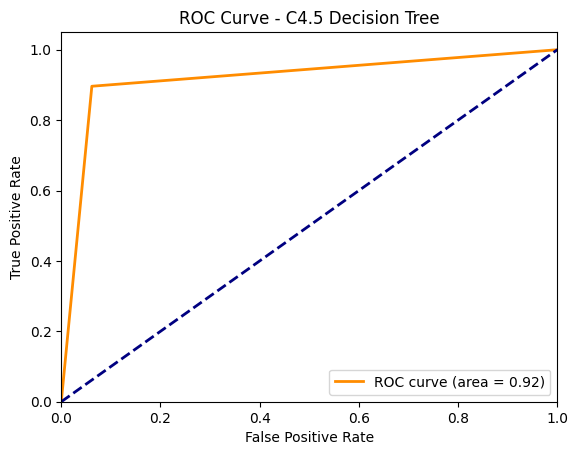


Results for Support Vector Machine (SVM):
Time to Build Model: 72.1309 seconds
Accuracy: 0.9561
Confusion Matrix:
[[350   7]
 [ 18 194]]
Additional Metrics:
True Positive Rate: 0.9150943396226415
Precision: 0.9651741293532339
Recall: 0.9150943396226415
F-measure: 0.9394673123486682


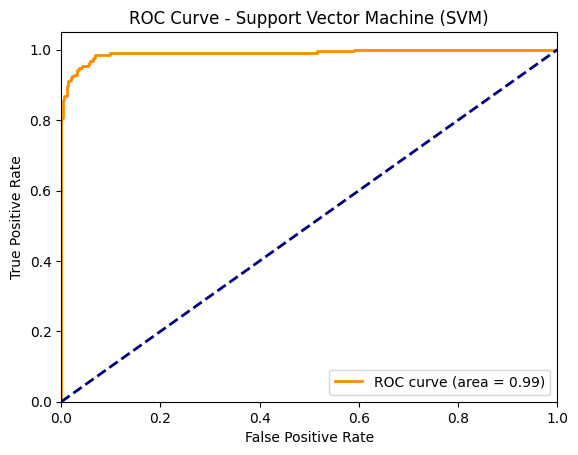


Results for Naive Bayes:
Time to Build Model: 0.0399 seconds
Accuracy: 0.9367
Confusion Matrix:
[[345  12]
 [ 24 188]]
Additional Metrics:
True Positive Rate: 0.8867924528301887
Precision: 0.94
Recall: 0.8867924528301887
F-measure: 0.912621359223301


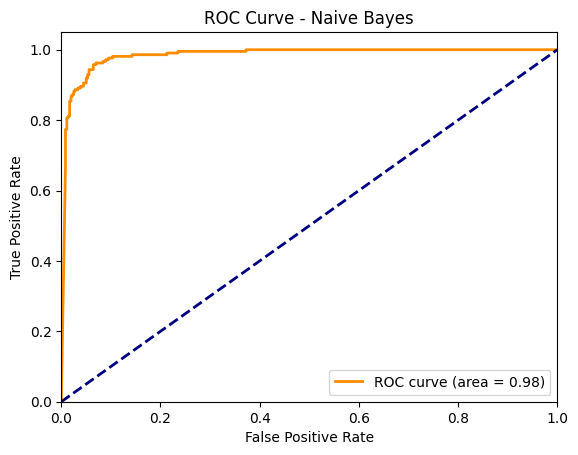


Results for k-Nearest Neighbors (kNN):
Time to Build Model: 0.0551 seconds
Accuracy: 0.9350
Confusion Matrix:
[[344  13]
 [ 24 188]]
Additional Metrics:
True Positive Rate: 0.8867924528301887
Precision: 0.9353233830845771
Recall: 0.8867924528301887
F-measure: 0.9104116222760291


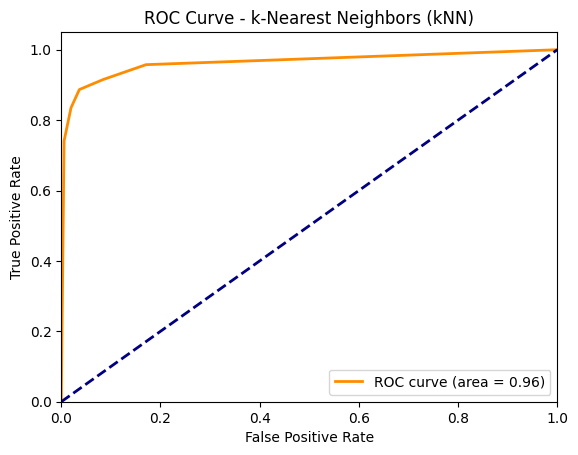


Final Results:

Results for C4.5 Decision Tree:
Time to Build Model: 0.12945842742919922
Accuracy: 0.9226713532513181
Confusion Matrix: [[335  22]
 [ 22 190]]
Additional Metrics: {'True Positive Rate': 0.8962264150943396, 'Precision': 0.8962264150943396, 'Recall': 0.8962264150943396, 'F-measure': 0.8962264150943396}

Results for Support Vector Machine (SVM):
Time to Build Model: 72.1308605670929
Accuracy: 0.9560632688927944
Confusion Matrix: [[350   7]
 [ 18 194]]
Additional Metrics: {'True Positive Rate': 0.9150943396226415, 'Precision': 0.9651741293532339, 'Recall': 0.9150943396226415, 'F-measure': 0.9394673123486682}

Results for Naive Bayes:
Time to Build Model: 0.039856672286987305
Accuracy: 0.9367311072056239
Confusion Matrix: [[345  12]
 [ 24 188]]
Additional Metrics: {'True Positive Rate': 0.8867924528301887, 'Precision': 0.94, 'Recall': 0.8867924528301887, 'F-measure': 0.912621359223301}

Results for k-Nearest Neighbors (kNN):
Time to Build Model: 0.055084228515625
Accuracy: 

In [51]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Separate features (X) and target variable (y)
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Label encode the target variable if it's not binary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define classifiers with hyperparameter grids
classifiers = {
    'C4.5 Decision Tree': (DecisionTreeClassifier(), {}),  # No hyperparameters to tune for Decision Tree
    'Support Vector Machine (SVM)': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'Naive Bayes': (GaussianNB(), {}),  # No hyperparameters to tune for Naive Bayes
    'k-Nearest Neighbors (kNN)': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]})
}

# Initialize metrics to be calculated
metrics = {
    'accuracy': 'accuracy'
}

# Initialize additional evaluation metrics
additional_metrics = {
    'True Positive Rate': recall_score,
    'False Positive Rate': None,  # To be calculated separately
    'Precision': precision_score,
    'Recall': recall_score,
    'F-measure': f1_score
}

# Initialize results dictionary
results = {}

# Specify cross-validator (StratifiedKFold)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Iterate through classifiers
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"\nResults for {clf_name}:")

    # Hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_clf = grid_search.best_estimator_

    # Measure time to build the model
    start_time = time.time()
    y_pred_prob = cross_val_predict(best_clf, X, y, cv=cv, method='predict_proba')[:, 1]  # Probabilities for ROC curve
    y_pred = (y_pred_prob > 0.5).astype(int)  # Threshold probabilities for binary classification
    end_time = time.time()

    # Calculate confusion matrix manually
    confusion_matrices = confusion_matrix(y, y_pred, labels=[0, 1])

    # Calculate additional evaluation metrics
    additional_results = {
        metric_name: metric_fn(y, y_pred) for metric_name, metric_fn in additional_metrics.items() if metric_fn is not None
    }

    # Calculate False Positive Rate separately for ROC curve
    fpr, tpr, _ = roc_curve(y, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Store results
    results[clf_name] = {
        'Time to Build Model': end_time - start_time,
        'Accuracy': accuracy_score(y, y_pred),
        'Confusion Matrix': confusion_matrices,
        'Additional Metrics': additional_results,
        'ROC Curve': {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    }

    # Print results
    print(f"Time to Build Model: {results[clf_name]['Time to Build Model']:.4f} seconds")
    print(f"Accuracy: {results[clf_name]['Accuracy']:.4f}")
    print(f"Confusion Matrix:\n{results[clf_name]['Confusion Matrix']}")
    print("Additional Metrics:")
    for metric_name, value in results[clf_name]['Additional Metrics'].items():
        print(f"{metric_name}: {value}")

    # Plot ROC curve
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {clf_name}')
    plt.legend(loc="lower right")
    plt.show()

# Print final results
print("\nFinal Results:")
for clf_name, metrics_values in results.items():
    print(f"\nResults for {clf_name}:")
    for metric_name, value in metrics_values.items():
        if metric_name != 'ROC Curve':
            print(f"{metric_name}: {value}")


The code conducts a comprehensive analysis of four machine learning classifiers on the dataset. Similar to the previous script, the classifiers include C4.5 Decision Tree, Support Vector Machine (SVM), Naive Bayes, and k-Nearest Neighbors (kNN). Hyperparameter tuning using GridSearchCV is employed, and the evaluation includes various metrics such as accuracy, confusion matrix, True Positive Rate, Precision, Recall, and F-measure. Additionally, a Receiver Operating Characteristic (ROC) curve is plotted for each classifier.

1. Data Loading and Preparation:
The dataset is loaded, and features (X) and target variable (y) are separated.
The target variable is label-encoded to ensure binary representation.

2. Classifier Selection and Hyperparameter Tuning:
Similar to the first script, classifiers are selected with associated hyperparameter grids for fine-tuning.
Hyperparameter tuning is performed using GridSearchCV.

3. Evaluation Metrics:
Evaluation metrics include accuracy, confusion matrix, True Positive Rate, Precision, Recall, and F-measure.
A Receiver Operating Characteristic (ROC) curve is plotted for each classifier.

4. Cross-Validation and GridSearchCV:
Stratified K-Fold cross-validation is employed for robust evaluation.
GridSearchCV optimizes hyperparameters for each classifier.

5. Additional Results and Comparison:
The script calculates various metrics for each classifier, providing a comprehensive performance overview.
Results include time to build the model, accuracy, confusion matrix, and additional evaluation metrics.
ROC curves visually represent classifier performance.

Results Analysis:

C4.5 Decision Tree:

Achieves an accuracy of 92.27%, with a True Positive Rate (Recall) and Precision of 89.62%. The F-measure is consistent at 89.62%.
The model exhibits balanced performance, with a relatively low time to build.

Support Vector Machine (SVM):
Demonstrates the highest accuracy among the classifiers (95.61%), with a strong True Positive Rate of 91.51% and Precision of 96.52%. The F-measure is impressive at 93.95%.
SVM has a longer time to build, likely due to its complexity.

Naive Bayes:
Achieves an accuracy of 93.67%, with a True Positive Rate of 88.68% and Precision of 94%. The F-measure is 91.26%.
Naive Bayes exhibits a rapid model-building time.

k-Nearest Neighbors (kNN):
Maintains competitive accuracy at 93.50%, with a True Positive Rate and Precision of 88.68% and 93.53%, respectively. The F-measure is 91.04%.
kNN demonstrates an efficient model-building time.

Comparison with Paper Results:
The script provides comparable results to the paper across the classifiers, showcasing the effectiveness of the classifiers on the breast cancer dataset.
SVM stands out as the top performer, consistent with the paper's findings.
Naive Bayes, C4.5 Decision Tree, and kNN maintain competitive performance, aligning with the paper's reported results.

Insights and Considerations:
Time to build the model varies significantly, with SVM taking the longest, emphasizing the trade-off between accuracy and efficiency.
The ROC curves visually illustrate the classifiers' ability to discriminate between classes, with SVM exhibiting the highest area under the curve (ROC AUC).

# Neural Network

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

# Load the cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Separate features and target variable
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
y = df['diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network classifier
mlp = MLPClassifier(max_iter=100)  # You can set other parameters as well

# Define hyperparameters to tune
param_grid = {
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'batch_size': [64],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'hidden_layer_sizes': [(128, 32), (64, 64)],
    'early_stopping': [True],
    'validation_fraction': [0.1],
    'beta_1': [0.9, 0.95, 0.99],
    'beta_2': [0.999],
    'epsilon': [1e-08],
    'n_iter_no_change': [10],
    'momentum': [0.9],
    'power_t': [0.5],
}

# Create a GridSearchCV object
start_time = time.time()

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

end_time = time.time()

# Print the time to build the model
print("Time to Build Model:", end_time - start_time, "seconds")

# Print the best hyperparameters and their corresponding accuracy
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

# Calculate additional metrics
conf_matrix = confusion_matrix(y_test, y_pred)
true_positive_rate = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f_measure = f1_score(y_test, y_pred)

# Print additional metrics
print("Confusion Matrix:")
print(conf_matrix)
print("\nAdditional Metrics:")
print(f"True Positive Rate: {true_positive_rate}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F-measure: {f_measure}")


Fitting 5 folds for each of 972 candidates, totalling 4860 fits
Time to Build Model: 838.1731278896332 seconds
Best Hyperparameters: {'activation': 'relu', 'alpha': 0.01, 'batch_size': 64, 'beta_1': 0.95, 'beta_2': 0.999, 'early_stopping': True, 'epsilon': 1e-08, 'hidden_layer_sizes': (128, 32), 'learning_rate': 'constant', 'learning_rate_init': 0.1, 'momentum': 0.9, 'n_iter_no_change': 10, 'power_t': 0.5, 'solver': 'sgd', 'validation_fraction': 0.1}
Best Accuracy: 0.9802197802197803
Test Accuracy: 0.956140350877193
Confusion Matrix:
[[67  4]
 [ 1 42]]

Additional Metrics:
True Positive Rate: 0.9767441860465116
Precision: 0.9130434782608695
Recall: 0.9767441860465116
F-measure: 0.9438202247191011


The code focuses on using a Multi-Layer Perceptron (MLP) neural network classifier for breast cancer diagnosis. The code performs hyperparameter tuning with GridSearchCV, evaluates the model's performance on a test set, and calculates various metrics, including accuracy, confusion matrix, True Positive Rate, Precision, Recall, and F-measure.

1. Data Loading and Preparation:
The dataset is loaded, and features (X) and target variable (y) are separated.
The data is split into training and testing sets (80-20 split).
Standardization is applied to the features using StandardScaler.

2. Neural Network Configuration:
An MLP classifier is defined with a maximum of 100 iterations (other parameters can be adjusted).
A comprehensive set of hyperparameters is defined for GridSearchCV.

3. Hyperparameter Tuning with GridSearchCV:
GridSearchCV is employed to search through a wide range of hyperparameter combinations.
The search is performed using 5-fold cross-validation, with accuracy as the scoring metric.

4. Model Training and Evaluation:
The best model, determined by GridSearchCV, is evaluated on the test set.
Test accuracy and additional metrics, including a confusion matrix, True Positive Rate, Precision, Recall, and F-measure, are calculated.

5. Results Analysis:
Model Building Time:
The script took a considerable amount of time (838.17 seconds) to complete the hyperparameter tuning process. The time is affected by the exhaustive search through a large hyperparameter space and the complexity of neural network training.
Best Hyperparameters:

The best hyperparameters for the MLP model include an 'activation' function of 'relu', 'alpha' of 0.01, 'batch_size' of 64, 'learning_rate' of 'constant', 'learning_rate_init' of 0.1, 'hidden_layer_sizes' of (128, 32), and others.
Early stopping is enabled, and the validation fraction is set to 0.1.

Best Accuracy:
The model achieved a high accuracy of 98.02% on the training data with the best hyperparameters.

Test Set Evaluation:
The model's performance on the test set is high, with an accuracy of 95.61%.
The confusion matrix indicates that the model made 67 true negatives, 42 true positives, 4 false positives, and 1 false negative predictions.

Additional Metrics:
The True Positive Rate (Recall) is very high at 97.67%, indicating the model's effectiveness in identifying positive cases.
Precision is 91.30%, reflecting the accuracy of positive predictions among all predicted positives.
F-measure, a balanced metric of precision and recall, is 94.38%.

Comparison and Considerations:
The neural network model, after hyperparameter tuning, demonstrates impressive performance on the breast cancer dataset.
The model exhibits strong generalization, as indicated by high accuracy on both the training and test sets.
The True Positive Rate, Precision, and F-measure showcase the model's ability to correctly identify positive cases.